In [29]:
from shapely.geometry import Point, Polygon
import json

In [41]:
with open('../../../data/Consolidated_Demographics_Index_for_King_County_Census_Tracts___demographic_index_area.geojson') as f:
    census_tract = json.load(f)

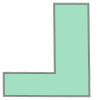

In [51]:
Polygon(census_tract['features'][0]['geometry']['coordinates'][0])

In [136]:
coords = []

for x in census_tract['features']:
    d = {}
    d['label'] = x['properties']['TRACT_LBL']
    if len(x['geometry']['coordinates']) == 1:
        d['shape'] = Polygon(x['geometry']['coordinates'][0])
    coords.append(d)

In [140]:
coords2 = []

for x in census_tract['features']:
    d = {}
    d['label'] = x['properties']['TRACT_LBL']
    shape = x['geometry']['coordinates']
    if len(shape) != 1:
        d['shape'] = Polygon(shape[0][0]+shape[1][0])
    else:
        d["shape"] = Polygon(shape[0])
    coords2.append(d)

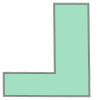

In [117]:
coords[0]['shape']

In [152]:
coords2[0:30]

[{'label': 'Tract 001701',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1beb0eb20>},
 {'label': 'Tract 001702',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1beb0e790>},
 {'label': 'Tract 001800',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1beb0eac0>},
 {'label': 'Tract 001600',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1beb0eaf0>},
 {'label': 'Tract 001500',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1beb0eb50>},
 {'label': 'Tract 001400',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1beb0e550>},
 {'label': 'Tract 001300',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1beb0ebb0>},
 {'label': 'Tract 001200',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1beb0ec10>},
 {'label': 'Tract 001900',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1beb0e640>},
 {'label': 'Tract 002600',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1beb0ed00>},
 {'label': 'Tract 002000',
  'shape': <shapely.geometry.polygon.Polygo

In [154]:
long = df.iloc[0]['long']
lat = df.iloc[0]['lat']
point = Point(long, lat)

coords2[0]['shape'].within(point)

False

In [151]:
coords[0:30]

[{'label': 'Tract 001701',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1bb40fd00>},
 {'label': 'Tract 001702',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1bb40fb80>},
 {'label': 'Tract 001800',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1bb40fd30>},
 {'label': 'Tract 001600',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1bb40fcd0>},
 {'label': 'Tract 001500',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1bb40fdc0>},
 {'label': 'Tract 001400',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1c2698250>},
 {'label': 'Tract 001300',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1c26983d0>},
 {'label': 'Tract 001200',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1c2698af0>},
 {'label': 'Tract 001900',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1d5703040>},
 {'label': 'Tract 002600',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1d57038e0>},
 {'label': 'Tract 002000',
  'shape': <shapely.geometry.polygon.Polygo

In [165]:
coords2[-1]

{'label': 'Tract 032327',
 'shape': <shapely.geometry.polygon.Polygon at 0x7fc1beeb74f0>}

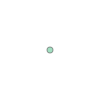

In [121]:
point

In [153]:
coord_shapes = []
for coord in coords:
    if len(coord) >= 2:
        coord_shapes.append(coord)
coord_shapes[0:30]

[{'label': 'Tract 001701',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1bb40fd00>},
 {'label': 'Tract 001702',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1bb40fb80>},
 {'label': 'Tract 001800',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1bb40fd30>},
 {'label': 'Tract 001600',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1bb40fcd0>},
 {'label': 'Tract 001500',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1bb40fdc0>},
 {'label': 'Tract 001400',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1c2698250>},
 {'label': 'Tract 001300',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1c26983d0>},
 {'label': 'Tract 001200',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1c2698af0>},
 {'label': 'Tract 001900',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1d5703040>},
 {'label': 'Tract 002600',
  'shape': <shapely.geometry.polygon.Polygon at 0x7fc1d57038e0>},
 {'label': 'Tract 002000',
  'shape': <shapely.geometry.polygon.Polygo

In [169]:
long = df.iloc[1]['long']
lat = df.iloc[1]['lat']
point = Point(long, lat)
point_list = []

for home in df:
    point_list.apppend(Point(df.iloc[home]['long'], df.iloc[home]['lat']))

AttributeError: 'list' object has no attribute 'apppend'

In [170]:
df.coordinates = list(zip(df.long, df.lat))

<ipython-input-170-4db589e91429>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.coordinates = list(zip(df.long, df.lat))


In [171]:
df.coordinates

[(-122.257, 47.5112),
 (-122.319, 47.721000000000004),
 (-122.23299999999999, 47.7379),
 (-122.39299999999999, 47.5208),
 (-122.045, 47.6168),
 (-122.005, 47.6561),
 (-122.32700000000001, 47.3097),
 (-122.315, 47.4095),
 (-122.337, 47.5123),
 (-122.031, 47.3684),
 (-122.145, 47.6007),
 (-122.292, 47.69),
 (-122.229, 47.7558),
 (-122.045, 47.6127),
 (-122.39399999999999, 47.67),
 (-122.375, 47.5714),
 (-121.962, 47.7277),
 (-122.34299999999999, 47.6648),
 (-122.21, 47.3089),
 (-122.306, 47.3343),
 (-122.34100000000001, 47.7025),
 (-122.23299999999999, 47.5316),
 (-122.169, 47.3266),
 (-122.166, 47.3533),
 (-122.17200000000001, 47.3739),
 (-122.21799999999999, 47.3048),
 (-122.36, 47.6386),
 (-122.314, 47.6221),
 (-122.304, 47.695),
 (-122.11, 47.7073),
 (-122.07, 47.5391),
 (-122.35700000000001, 47.7274),
 (-122.368, 47.6823),
 (-122.375, 47.6889),
 (-122.15700000000001, 47.4276),
 (-122.31, 47.6827),
 (-122.132, 47.6621),
 (-122.36200000000001, 47.6702),
 (-122.28200000000001, 47.3341)

In [233]:
tracts = []
for coordinate in df.coordinates:
    point = Point(coordinate)
    found = False
    for x in coords2:
        if x['shape'].contains(point):
            tracts.append(x['label'])
            found = True
            
    if not found:
        tracts.append(0)
        

In [235]:
len(tracts)

21597

In [237]:
df['tracts'] = tracts

In [244]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,tracts
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,Tract 011900
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Tract 000200
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,Tract 022102
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Tract 011600
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Tract 032317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,Tract 001300
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,Tract 026600
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,Tract 008900
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,Tract 025006


In [246]:
df.to_csv('housing_data.csv')